# V@R calculation of a portfolio with two assets (NatWest and BP stocks)

In [86]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

In [87]:
# download the dataset 

df = pd.read_csv('D:/VAR_Python/VAR_Python.csv',index_col='Date',parse_dates=True)
df

C:\Users\andre\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15/02/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\andre\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14/02/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\andre\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13/02/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\andre\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\andre\anaconda3\lib

,NatWest,BP
Date,,
2023-02-15,300.799988,553.090027
2023-02-14,305.000000,553.485229
2023-02-13,303.799988,550.817200
2023-10-02,304.500000,553.386475
2023-09-02,306.399994,539.255371
...,...,...
2022-02-22,229.833618,369.510590
2022-02-21,228.486176,371.327087
2022-02-18,225.695053,374.195190


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-02-15 to 2022-02-16
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NatWest  248 non-null    float64
 1   BP       248 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


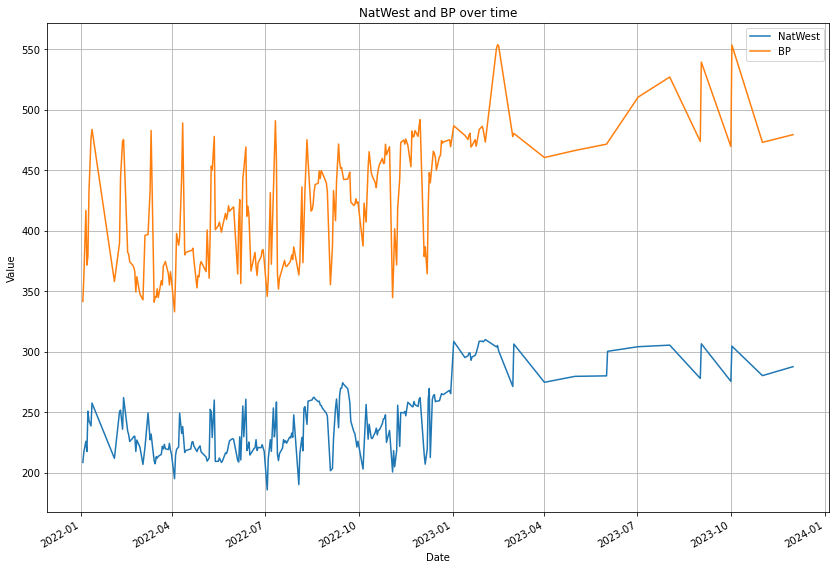

In [89]:
# line chart
df.plot(kind='line', y=['NatWest','BP'], figsize=(14, 10))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('NatWest and BP over time')
plt.legend(loc='upper right')
plt.grid(True)

# Filter the data by month
filtered_data = df[df.index.month % 12 == 0]

plt.show()

In [90]:
df.describe()

,NatWest,BP
count,248.000000,248.000000
mean,241.416988,422.931928
std,28.079282,48.863461
min,185.608948,332.846344
25%,219.462601,375.352013
50%,232.250000,423.599487
75%,259.083740,465.659874
max,309.899994,553.485229


In [91]:
# correlation coefficient
correlation = np.corrcoef(df['NatWest'], df['BP'])[0, 1]

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.8030811996228149


In [92]:
# Percentage of returns'return_per_NatWest' and 'return_per_BP'
df['return_per_NatWest'] = np.log(df['NatWest'] / df['NatWest'].shift(-1))*100
df['return_per_BP'] = np.log(df['BP']/df['BP'].shift(-1))*100

# Drop the last row since it will have a missing value
df = df.iloc[:-1]

In [93]:
df.head()

,NatWest,BP,return_per_NatWest,return_per_BP
Date,,,,
2023-02-15,300.799988,553.090027,-1.386622,-0.071428
2023-02-14,305.000000,553.485229,0.394223,0.483207
2023-02-13,303.799988,550.817200,-0.230154,-0.465363
2023-10-02,304.500000,553.386475,-0.622033,2.586738
2023-09-02,306.399994,539.255371,0.359656,2.317286


In [94]:
df.tail()

,NatWest,BP,return_per_NatWest,return_per_BP
Date,,,,
2022-02-23,230.026138,366.068848,0.083730,-0.935798
2022-02-22,229.833618,369.510590,0.587994,-0.490391
2022-02-21,228.486176,371.327087,1.229094,-0.769425
2022-02-18,225.695053,374.195190,-2.443278,-1.647070
2022-02-17,231.277328,380.409485,-1.281769,-0.423945


WE now need to calculate the monetary return of the portifolio, therefore, we need to create a new variable that shows
the tolat amount invested on each asset.

In [95]:
port_invest_NatWest = 1500000
port_invest_BP = 500000

In [96]:
df['return_natwest'] = df['return_per_NatWest'] * port_invest_NatWest
df['return_BP'] = df['return_per_BP'] * port_invest_BP

C:\Users\andre\AppData\Local\Temp\ipykernel_4052\1727186397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return_natwest'] = df['return_per_NatWest'] * port_invest_NatWest
C:\Users\andre\AppData\Local\Temp\ipykernel_4052\1727186397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return_BP'] = df['return_per_BP'] * port_invest_BP


In [97]:
df.head()

,NatWest,BP,return_per_NatWest,return_per_BP,return_natwest,return_BP
Date,,,,,,
2023-02-15,300.799988,553.090027,-1.386622,-0.071428,-2.079934e+06,-3.571398e+04
2023-02-14,305.000000,553.485229,0.394223,0.483207,5.913339e+05,2.416036e+05
2023-02-13,303.799988,550.817200,-0.230154,-0.465363,-3.452305e+05,-2.326817e+05
2023-10-02,304.500000,553.386475,-0.622033,2.586738,-9.330497e+05,1.293369e+06
2023-09-02,306.399994,539.255371,0.359656,2.317286,5.394837e+05,1.158643e+06


In [98]:
conversion_factor = 100  # conversion factor

df['return_natwest'] = df['return_natwest'] / conversion_factor
df['return_BP'] = df['return_BP'] / conversion_factor
df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_4052\1352318499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return_natwest'] = df['return_natwest'] / conversion_factor
C:\Users\andre\AppData\Local\Temp\ipykernel_4052\1352318499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return_BP'] = df['return_BP'] / conversion_factor


,NatWest,BP,return_per_NatWest,return_per_BP,return_natwest,return_BP
Date,,,,,,
2023-02-15,300.799988,553.090027,-1.386622,-0.071428,-20799.336638,-357.139756
2023-02-14,305.000000,553.485229,0.394223,0.483207,5913.338918,2416.035790
2023-02-13,303.799988,550.817200,-0.230154,-0.465363,-3452.304732,-2326.816777
2023-10-02,304.500000,553.386475,-0.622033,2.586738,-9330.496701,12933.690939
2023-09-02,306.399994,539.255371,0.359656,2.317286,5394.836773,11586.430887


In [99]:
# Total portfolio 
df['Portfolio'] = (df['return_natwest'] + df['return_BP'])
df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_4052\500463732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Portfolio'] = (df['return_natwest'] + df['return_BP'])


,NatWest,BP,return_per_NatWest,return_per_BP,return_natwest,return_BP,Portfolio
Date,,,,,,,
2023-02-15,300.799988,553.090027,-1.386622,-0.071428,-20799.336638,-357.139756,-21156.476394
2023-02-14,305.000000,553.485229,0.394223,0.483207,5913.338918,2416.035790,8329.374708
2023-02-13,303.799988,550.817200,-0.230154,-0.465363,-3452.304732,-2326.816777,-5779.121509
2023-10-02,304.500000,553.386475,-0.622033,2.586738,-9330.496701,12933.690939,3603.194238
2023-09-02,306.399994,539.255371,0.359656,2.317286,5394.836773,11586.430887,16981.267660


In [101]:
# frequency of returns
return_frequency = df['Portfolio'].value_counts().sort_index()

# returns and frequencies
return_table = pd.DataFrame({'Return': return_frequency.index, 'Frequency': return_frequency})

print(return_table)

                       Return  Frequency
-154217.168714 -154217.168714          1
-121778.640446 -121778.640446          1
-108015.775553 -108015.775553          1
-103028.690024 -103028.690024          1
-101075.637935 -101075.637935          1
...                       ...        ...
 71807.207404    71807.207404          1
 76897.429582    76897.429582          1
 81380.835040    81380.835040          1
 120716.106068  120716.106068          1
 130077.025838  130077.025838          1

[247 rows x 2 columns]


In [102]:
return_table.head()

,Return,Frequency
-154217.168714,-154217.168714,1
-121778.640446,-121778.640446,1
-108015.775553,-108015.775553,1
-103028.690024,-103028.690024,1
-101075.637935,-101075.637935,1


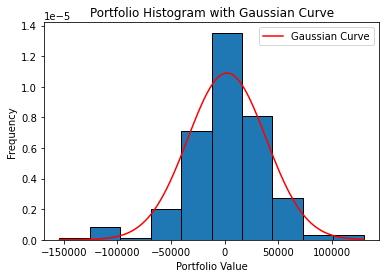

In [105]:
import scipy.stats as stats

# Plot the histogram
plt.hist(return_table['Return'], bins=10, edgecolor='black', density=True)

# Fit a Gaussian distribution to the data
mu, sigma = stats.norm.fit(return_table['Return'])
x = np.linspace(return_table['Return'].min(), return_table['Return'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Gaussian curve
plt.plot(x, pdf, 'r-', label='Gaussian Curve')

# labels and title
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.title('Portfolio Histogram with Gaussian Curve')
plt.legend()

plt.show()

In [107]:
# calculatingthe percentile as 1%
percentile_1 = np.percentile(df['Portfolio'], 1)
print(percentile_1)

-105721.71620981037


-£105,721.72 is our worst scenario of a loss and I am 99% confident that the actual loss would not exceed this threshold. 

In [108]:
# calculatingthe percentile as 5%
percentile_5 = np.percentile(df['Portfolio'], 5)
print(percentile_5)

-58669.72689751976


-£58,669.73 is our worst scenario of a loss and I am 95% confident that the actual loss would not exceed this threshold. 

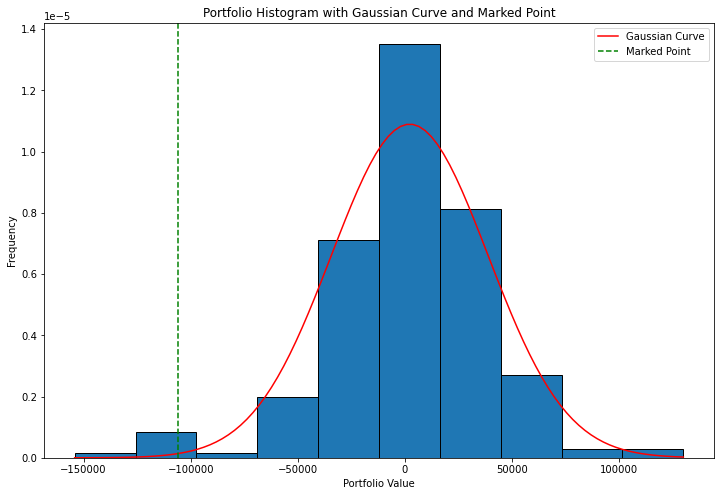

In [112]:
# histogram
plt.figure(figsize=(12, 8)) 

plt.hist(return_table['Return'], bins=10, edgecolor='black', density=True)

# Gaussian distribution to the data
mu, sigma = stats.norm.fit(return_table['Return'])
x = np.linspace(return_table['Return'].min(), return_table['Return'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Gaussian curve
plt.plot(x, pdf, 'r-', label='Gaussian Curve')

# V@R point
x_value = -105721.71620981037  # This is my V@R threshold
plt.axvline(x=x_value, color='green', linestyle='--', label='Marked Point')

# labels and title
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.title('Portfolio Histogram with Gaussian Curve and Marked Point')
plt.legend()

plt.show()